# Dispute Analysis Dashboard

This notebook visualizes the results from the dispute classification and resolution suggestion models. It uses Plotly to create interactive charts for analyzing trends and distributions in the dispute data.

## 1. Setup and Data Loading

First, we'll import the necessary libraries and load our datasets. We willload the `combined.csv` for easy analysis. This combined file is saved in the `results` directory.

In [4]:
import pandas as pd
import plotly.express as px
import os

# Define file paths

combined_path = './results/combined.csv'
df = pd.read_csv(combined_path)
# Convert 'created_at' to datetime for time-series analysis
df['created_at'] = pd.to_datetime(df['created_at'])

df.head()

,dispute_id,predicted_category,confidence,explanation,contains_fraud_keyword,contains_refund_keyword,is_verified_duplicate,is_verified_failed,txn_type,amount,created_at,suggested_action,justification,status
0,D001,DUPLICATE_CHARGE,0.977577,Prediction primarily based on: the rule 'conta...,0,0,1,0,UPI,999,2025-08-01 10:23:11,Auto-refund,High-confidence prediction validated by transa...,unresolved
1,D002,FAILED_TRANSACTION,0.970087,Prediction primarily based on: the rule 'is ve...,0,1,0,1,NEFT,1250,2025-08-01 11:55:09,Escalate to bank,NEFT transactions require inter-bank communica...,unresolved
2,D003,FAILED_TRANSACTION,0.989920,Prediction primarily based on: the rule 'is ve...,0,1,0,1,CARD,500,2025-08-01 12:10:43,Auto-refund,High-confidence prediction of a failed but deb...,unresolved
3,D004,FRAUD,0.961152,Prediction primarily based on: the rule 'conta...,1,0,0,0,CARD,1200,2025-08-01 13:30:01,Mark as potential fraud,"Prediction indicates a high risk of fraud, req...",unresolved
4,D005,REFUND_PENDING,0.519488,Prediction primarily based on: the rule 'conta...,0,1,0,1,CARD,750,2025-08-01 14:02:18,Manual review,Category 'REFUND_PENDING' requires an agent to...,unresolved


## 2. Visualize Dispute Trends Over Time

This bar chart shows the number of disputes raised each day. This helps identify spikes in dispute volumes, which might correlate with system outages or other events.

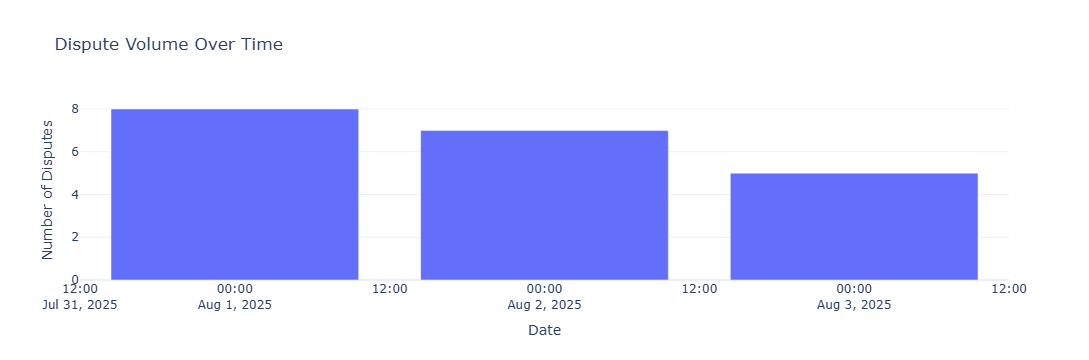

In [5]:
# Group data by date
disputes_by_day = df.groupby(df['created_at'].dt.date).size().reset_index(name='count')

fig = px.bar(
    disputes_by_day, 
    x='created_at', 
    y='count', 
    title='Dispute Volume Over Time',
    labels={'created_at': 'Date', 'count': 'Number of Disputes'},
    template='plotly_white'
)

fig.update_layout(xaxis_title='Date', yaxis_title='Number of Disputes')
fig.show()

## 3. Dispute Distribution by Predicted Category

This pie chart provides a clear breakdown of all disputes by the predicted category. It's useful for understanding which types of issues are most common.

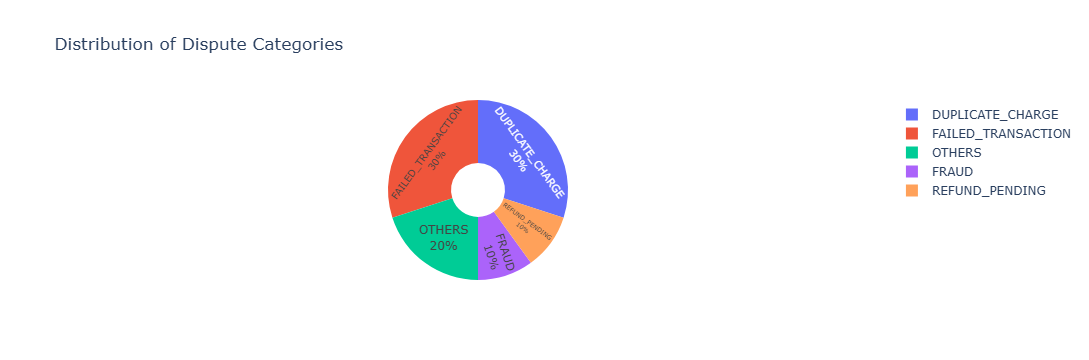

In [6]:
category_counts = df['predicted_category'].value_counts().reset_index()
category_counts.columns = ['category', 'count']

fig = px.pie(
    category_counts, 
    names='category', 
    values='count', 
    title='Distribution of Dispute Categories',
    hole=0.3
)

fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

## 4. Distribution of Suggested Resolutions

This bar chart shows the outcome of the resolution suggestion engine. It helps quantify how many disputes are being automated (`Auto-refund`), escalated, or sent for manual review, providing insight into operational workload.

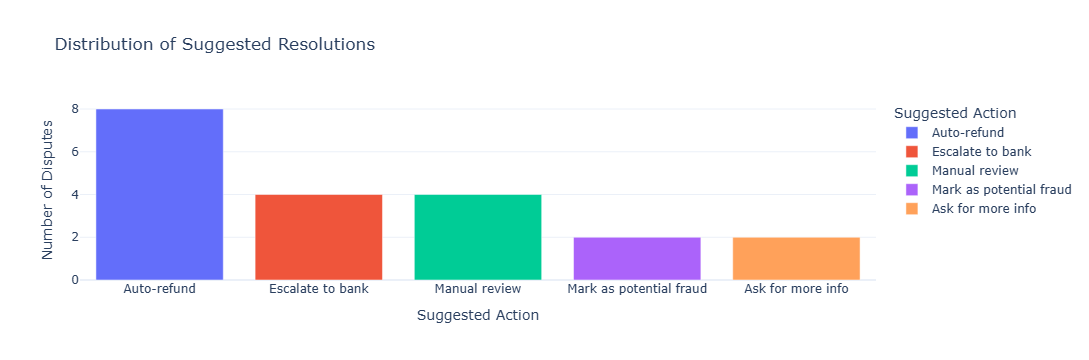

In [7]:
action_counts = df['suggested_action'].value_counts().reset_index()
action_counts.columns = ['action', 'count']

fig = px.bar(
    action_counts, 
    x='action', 
    y='count', 
    title='Distribution of Suggested Resolutions',
    labels={'action': 'Suggested Action', 'count': 'Number of Disputes'},
    color='action',
    template='plotly_white'
)
fig.update_layout(xaxis_title='Suggested Action', yaxis_title='Number of Disputes')
fig.show()

## 5. Dispute Amount Analysis by Category

A box plot is used to show the distribution of transaction amounts for each dispute category. This can reveal important patterns, such as whether 'Fraud' disputes typically involve higher amounts than 'Duplicate Charges'.

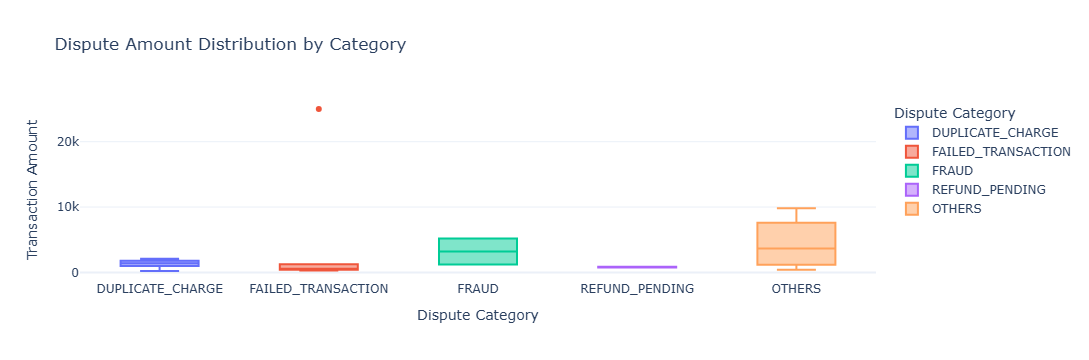

In [8]:
fig = px.box(
    df, 
    x='predicted_category', 
    y='amount', 
    title='Dispute Amount Distribution by Category',
    labels={'predicted_category': 'Dispute Category', 'amount': 'Transaction Amount (INR)'},
    color='predicted_category',
    template='plotly_white'
)
fig.update_layout(xaxis_title='Dispute Category', yaxis_title='Transaction Amount')
fig.show()